Data Visalizations

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [46]:
#load dat aset from csv source file
data_set = pd.read_csv('DataSets/RawDataWithStudentsRemoved.csv')

print(data_set.head())

#review data set structure
data_set.dtypes
data_set.shape

#remove null term GPA from data set
data_set = data_set.dropna(subset = ['TermGPA'])

   FakeIdentifier  Age  Gender PrimaryMilitaryAffiliation AcademicCareer  \
0               1   18  Female    No Military Affiliation  Undergraduate   
1               2   72    Male    No Military Affiliation            Law   
2               3   26    Male    No Military Affiliation       Graduate   
3               4   47  Female                    Veteran       Graduate   
4               5   45    Male    No Military Affiliation  Undergraduate   

                          College  NumberofClassesEnrolled  TermGPA  \
0              College of Science                        4     3.75   
1   James E Rogers College of Law                        3     4.00   
2          College of Engineering                        2      NaN   
3       Coll of Ag Life & Env Sci                        2     4.00   
4  College of Information Science                        2     2.00   

   CumulativeGPA  UnitsPassedincludedinGPA  UnitsPassednotincludedinGPA  \
0          3.636                         

Let's visualized the Term GPA Distribution

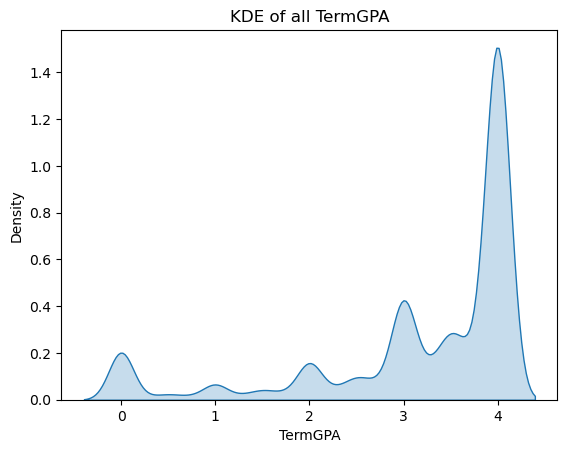

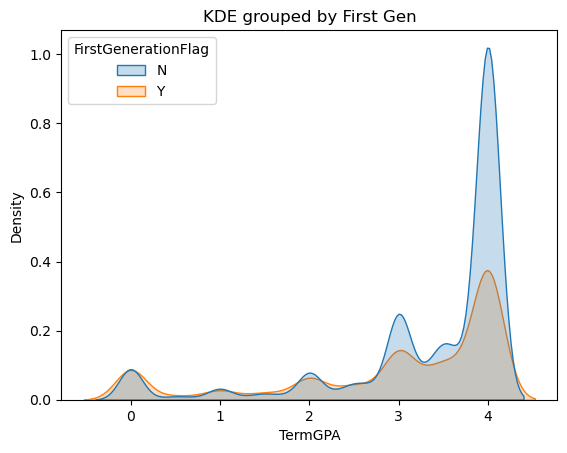

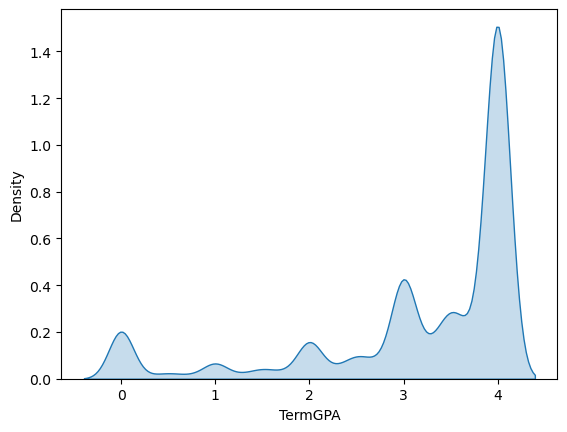

In [14]:
#make a Kernal Density Estimate PLot of all term GPA values
sns.kdeplot( data = data_set, x = 'TermGPA', fill = True)
plt.title('KDE of all TermGPA')
plt.show()


#by category:
sns.kdeplot( data = data_set, x = 'TermGPA', hue = 'FirstGenerationFlag', fill = True)
plt.title('KDE grouped by First Gen')
plt.show()


# make A histogram instead
sns.kdeplot( data = data_set, x = 'TermGPA', fill = True)
plt.show()

In [23]:
#Medians by Group

data_medians = data_set.groupby(['College', 'FirstGenerationFlag'])['TermGPA'].median().reset_index()

print(data_medians)

#Average by Group

data_means = data_set.groupby(['College', 'FirstGenerationFlag'])['TermGPA'].mean().reset_index()


                           College FirstGenerationFlag  TermGPA
0   Col Arch Plan & Landscape Arch                   N   4.0000
1   Col Arch Plan & Landscape Arch                   Y   3.6250
2        Coll of Ag Life & Env Sci                   N   3.6000
3        Coll of Ag Life & Env Sci                   Y   3.5000
4    College of Applied Sci & Tech                   N   4.0000
5    College of Applied Sci & Tech                   Y   3.3395
6             College of Education                   N   4.0000
7             College of Education                   Y   3.9500
8           College of Engineering                   N   4.0000
9           College of Engineering                   Y   3.5000
10            College of Fine Arts                   N   3.7270
11            College of Fine Arts                   Y   3.5000
12           College of Humanities                   N   3.4620
13           College of Humanities                   Y   3.5000
14  College of Information Science      

In [29]:
gpa_pivot = data_means.pivot(index='College', columns='FirstGenerationFlag', values='TermGPA')

#print(gpa_pivot)

gpa_mean_diff_by_college = gpa_pivot['N'] - gpa_pivot['Y']




print(gpa_mean_diff_by_college.sort_values(ascending = False))

College
College of Engineering            0.588556
Eller College of Management       0.586412
Zuckerman Coll Public Health      0.416424
College of Education              0.395769
College of Fine Arts              0.354513
College of Applied Sci & Tech     0.353581
Col Arch Plan & Landscape Arch    0.342375
College of Social & Behav Sci     0.334224
College of Medicine - Tucson      0.305340
College of Science                0.186402
College of Information Science    0.155623
Colleges of Letters Arts & Sci    0.155030
Coll of Ag Life & Env Sci         0.137401
Undergraduate Education           0.121670
James E Rogers College of Law     0.042876
College of Humanities             0.017528
Graduate College                 -0.000894
College of Nursing               -0.007494
James C Wyant Coll Optical Sci   -0.208166
College of Medicine - Phoenix          NaN
dtype: float64


In [35]:
# t test for significant difference

from scipy.stats import ttest_ind

In [34]:
y_first_gen = data_set[data_set['FirstGenerationFlag'] == 'Y']['TermGPA']
n_first_gen = data_set[data_set['FirstGenerationFlag'] == 'N']['TermGPA']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(y_first_gen, n_first_gen, equal_var=False)

print(f"FirstGen Y Mean GPA: {np.mean(y_first_gen):.3f}")
print(f"FirstGen N Mean GPA: {np.mean(n_first_gen):.3f}")


print(f"\nT-statistic: {t_statistic}")
print(f"P-value: {p_value}")

FirstGen Y Mean GPA: 2.961
FirstGen N Mean GPA: 3.340

T-statistic: -36.27059070487363
P-value: 1.6162248398096864e-283


In [ ]:
#allowed_values = ['College of Medicine - Phoenix', 'College of Fine Arts', 'Col Arch Plan & Landscape Arch', 'Zuckerman Coll Public Health']
#data_set = data_set[~data_set['College'].isin(allowed_values)]

college_ttest_results = {}

for d_value in data_set['College'].unique():
        subset_df = data_set[data_set['College'] == d_value]
        
        first_gen_col_y = subset_df[subset_df['FirstGenerationFlag'] == 'Y']['TermGPA']
        first_gen_col_n = subset_df[subset_df['FirstGenerationFlag'] == 'N']['TermGPA']
        
        
        # Perform independent samples t-test
        t_statistic, p_value = ttest_ind(first_gen_col_y, first_gen_col_n, equal_var=False) 
        # Set equal_var=False if you suspect unequal variances
        
college_ttest_results[d_value] = {'t_statistic': t_statistic, 'p_value': p_value}

print(college_ttest_results)

{'College of Engineering': {'t_statistic': -9.231056262597033, 'p_value': 3.5781726529644965e-19}}


c:\Users\grann\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [49]:
y_first_gen_col = data_set[(data_set['FirstGenerationFlag'] == 'Y') & (data_set['College'] == 'Eller College of Management')]['TermGPA']
n_first_gen_col = data_set[(data_set['FirstGenerationFlag'] == 'N') & (data_set['College'] == 'Eller College of Management')]['TermGPA']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(y_first_gen_col, n_first_gen_col, equal_var=False)

print(f"FirstGen Y Mean GPA: {np.mean(y_first_gen_col):.3f}")
print(f"FirstGen N Mean GPA: {np.mean(n_first_gen_col):.3f}")


print(f"\nT-statistic: {t_statistic}")
print(f"P-value: {p_value}")

FirstGen Y Mean GPA: 2.715
FirstGen N Mean GPA: 3.302

T-statistic: -24.21981167218916
P-value: 1.7685346584343345e-124


In [ ]:
#plot the medians

ax = sns.boxplot(data = data_set, x = 'College', y = 'TermGPA', hue = 'FirstGenerationFlag')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') 
#plt.figure(figsize = (14,8 ))
plt.show()


In [ ]:
#Medians
axis = sns.scatterplot(data = data_means, x = 'College', y = 'TermGPA',  hue = 'FirstGenerationFlag')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 
plt.grid()
plt.title('Average Term GPA by College')
plt.show()

axis = sns.barplot(data = data_medians, x = 'College', y = 'TermGPA',  hue = 'FirstGenerationFlag')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 

plt.show()




In [ ]:
axis = snsplot(data = data_set, y = 'TermGPA',  hue = 'FirstGenerationFlag')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 
plt.show()

c:\Users\grann\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


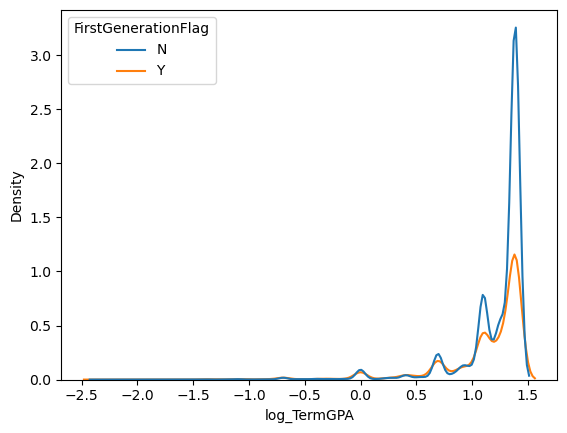

In [21]:
data_set['log_TermGPA'] = np.log(data_set['TermGPA'])

axis = sns.kdeplot(data = data_set, x = 'log_TermGPA',  hue = 'FirstGenerationFlag')
#axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right') 
plt.show()

In [1]:
#kmeans
from sklearn.cluster import KMeans

In [5]:
#encode features for kmeans
columns_to_encode = ['FirstGenerationFlag']
x_encoded = pd.get_dummies(data_set,
                                  columns=columns_to_encode,
                                    drop_first=True,
                                      dtype = int)

In [6]:
x = x_encoded[['TermGPA', 'FirstGenerationFlag_Y']].values

In [7]:
kmeans = KMeans(n_clusters=4, random_state=698, n_init='auto') # Example with 2 clusters
kmeans.fit(x)

KMeans(n_clusters=4, random_state=698)

In [8]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_ 

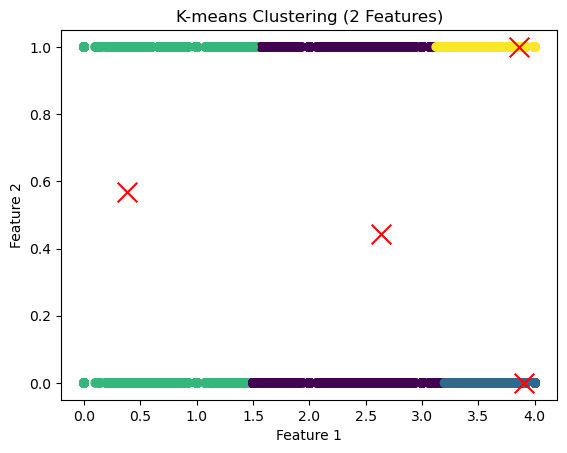

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.title('K-means Clustering (2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()